In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from globalVariables import *
import simpleCNNwithInception as inceptionCNN
import simpleCNN as simpleCNN
import simpleCNNwithInceptionRegression as regressor
from keras.callbacks import CSVLogger
from scipy.ndimage import rotate
from tools import plot_confusion_matrix

#### 1. Fiducial, all four models

In [5]:
train_a, test_a = get_tf_DataSet(augment_data=True, channels=['total','stellar'], \
                             simulationNames=['CDM','SIDM0.1'])
dataset_to_numpy = list(train.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0].shape[1:]
model_a = simpleCNN.getModel(inputShape, train_a.num_classes, nAttributes=0)
epochs=20
au_history = model_a.fit(
  x=train_a,
    validation_data=test_a,
  epochs=epochs
)

Epoch 1/20
60/60 [==============================] - 5s 78ms/step - loss: 0.6857 - accuracy: 0.5500 - val_loss: 0.7017 - val_accuracy: 0.5219
Epoch 2/20
60/60 [==============================] - 4s 74ms/step - loss: 0.6593 - accuracy: 0.6141 - val_loss: 0.6735 - val_accuracy: 0.6159
Epoch 3/20
60/60 [==============================] - 4s 74ms/step - loss: 0.6277 - accuracy: 0.6562 - val_loss: 0.6313 - val_accuracy: 0.6618
Epoch 4/20
60/60 [==============================] - 4s 74ms/step - loss: 0.6068 - accuracy: 0.6724 - val_loss: 0.6067 - val_accuracy: 0.6973
Epoch 5/20
60/60 [==============================] - 4s 74ms/step - loss: 0.5896 - accuracy: 0.6917 - val_loss: 0.5882 - val_accuracy: 0.6952
Epoch 6/20
60/60 [==============================] - 4s 74ms/step - loss: 0.5823 - accuracy: 0.6984 - val_loss: 0.5693 - val_accuracy: 0.7161
Epoch 7/20
60/60 [==============================] - 5s 75ms/step - loss: 0.5694 - accuracy: 0.7089 - val_loss: 0.5739 - val_accuracy: 0.7035
Epoch 8/20
60

In [6]:
train_b, test_b = get_tf_DataSet(augment_data=True, channels=['total','stellar'], \
                             simulationNames=['SIDM0.1','SIDM0.3'])
dataset_to_numpy = list(train_b.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0].shape[1:]
model_b = simpleCNN.getModel(inputShape, train_b.num_classes, nAttributes=0)
epochs=20
au_history = model_b.fit(
  x=train_b,
    validation_data=test_b,
  epochs=epochs
)

Epoch 1/20
60/60 [==============================] - 5s 79ms/step - loss: 0.6906 - accuracy: 0.5281 - val_loss: 0.6817 - val_accuracy: 0.5846
Epoch 2/20
60/60 [==============================] - 5s 75ms/step - loss: 0.6826 - accuracy: 0.5682 - val_loss: 0.6778 - val_accuracy: 0.5658
Epoch 3/20
60/60 [==============================] - 5s 75ms/step - loss: 0.6731 - accuracy: 0.5844 - val_loss: 0.6716 - val_accuracy: 0.5825
Epoch 4/20
60/60 [==============================] - 5s 75ms/step - loss: 0.6659 - accuracy: 0.5969 - val_loss: 0.6681 - val_accuracy: 0.6054
Epoch 5/20
60/60 [==============================] - 5s 75ms/step - loss: 0.6594 - accuracy: 0.6099 - val_loss: 0.6598 - val_accuracy: 0.6138
Epoch 6/20
60/60 [==============================] - 5s 75ms/step - loss: 0.6541 - accuracy: 0.6193 - val_loss: 0.6623 - val_accuracy: 0.6013
Epoch 7/20
60/60 [==============================] - 5s 75ms/step - loss: 0.6493 - accuracy: 0.6240 - val_loss: 0.6630 - val_accuracy: 0.6096
Epoch 8/20
60

In [7]:
train_c, test_c = get_tf_DataSet(augment_data=True, channels=['total','stellar'], \
                             simulationNames=['SIDM0.3','SIDM1'])
dataset_to_numpy = list(train_c.as_numpy_iterator())
inputShape = dataset_to_numpy[0][0].shape[1:]
model_c = simpleCNN.getModel(inputShape, train_c.num_classes, nAttributes=0)
epochs=20
au_history = fiducial.fit(
  x=train_c,
    validation_data=test_c,
  epochs=epochs
)

Epoch 1/20
60/60 [==============================] - 5s 78ms/step - loss: 0.6658 - accuracy: 0.6141 - val_loss: 0.7179 - val_accuracy: 0.6013
Epoch 2/20
60/60 [==============================] - 5s 75ms/step - loss: 0.6071 - accuracy: 0.6677 - val_loss: 0.6311 - val_accuracy: 0.6764
Epoch 3/20
60/60 [==============================] - 5s 75ms/step - loss: 0.5686 - accuracy: 0.7167 - val_loss: 0.6211 - val_accuracy: 0.6889
Epoch 4/20
60/60 [==============================] - 5s 75ms/step - loss: 0.5571 - accuracy: 0.7177 - val_loss: 0.5587 - val_accuracy: 0.7119
Epoch 5/20
60/60 [==============================] - 5s 76ms/step - loss: 0.5448 - accuracy: 0.7255 - val_loss: 0.5508 - val_accuracy: 0.7286
Epoch 6/20
60/60 [==============================] - 5s 76ms/step - loss: 0.5379 - accuracy: 0.7302 - val_loss: 0.5440 - val_accuracy: 0.7265
Epoch 7/20
60/60 [==============================] - 5s 76ms/step - loss: 0.5179 - accuracy: 0.7542 - val_loss: 0.5811 - val_accuracy: 0.7223
Epoch 8/20
60

In [8]:
combined_test = test_a.concatenate(test_b)
combined_test = combined_test.concatenate(test_c)

In [12]:
list_of_models = [model_a, model_b, model_c]

In [19]:
def predict( test_set, list_of_models ):
    
    predictions = None
    for iL, iModel in enumerate(list_of_models):
        
        if predictions is None:
            predictions = np.argmax(iModel.predict( test_set ), axis=-1)
        else:
            new_predict = np.argmax(iModel.predict( test_set ), axis=-1)
            predictions[ predictions == iL ] += new_predict[ predictions == iL]
    return predictions

In [38]:
y_true = []
for iY, y_test in enumerate([test_a, test_b, test_c]):
    y_true += [ y.numpy()+iY for xb, yb in y_test for y in yb]
    
    

/data2/harvey/tensorflow/examples/tools.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, size = 15)
/data2/harvey/tensorflow/examples/tools.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels, size = 15)


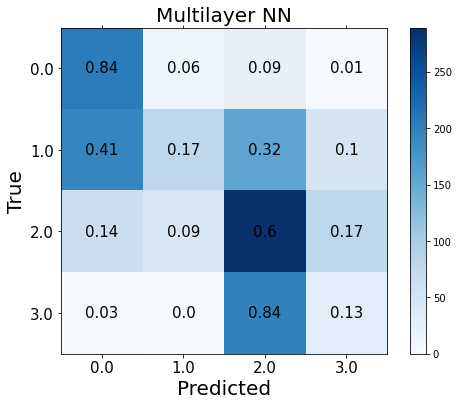

In [41]:
plot_confusion_matrix( y_true, y_pred)

In [20]:
y_pred = predict( combined_test, list_of_models)

45/45 [==============================] - 1s 17ms/step


In [21]:
y_pred

array([2, 3, 0, ..., 3, 2, 2])

(array([469.,   0.,   0., 138.,   0.,   0., 665.,   0.,   0., 165.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

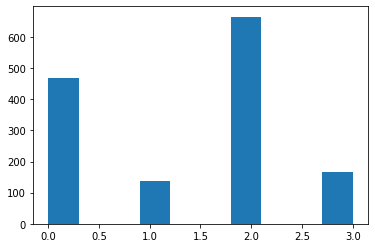

In [22]:
plt.hist(y_pred)